## Machine learning workflow

1. Data
2. Feature selection  
3. Data cleaning 
4. Data preprocessing
5. Machine learning modelling 

### This dataset was provided to me by alma better as part of their curriculum 

> The dataset is about the rented bike counts during different seasons,different weather conditions ,during what year,months ,days,etc


###  Objective of the ML model :

* The main objective of the ml model is to predict the rented bike count 

## The data set is about how bikes are rented and their renting patterns and what factors determine the condition to rent the bikes during different conditions 

In [1]:
#let us import the necessary libraries for our eda since we need to explore the data
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
data = pd.read_csv('SeoulBikeData.csv',encoding="ISO-8859-1")

## Below is the data that we will be using for our exploratory data analysis


In [3]:
data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


### Objective - 
     1) Perform EDA and record the observations.
     2) Clean data,check for outliers 
     3) Data preprocessing like feature scaling ,feature engineering
     4) Modelling 
     5) Model Evaluation using suitable metrics
     6) Model explainability and conclusion of how the model has perfromed 

In [4]:
#let us check the head of the dataframe
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
#let us check the tail 
data.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [6]:
#let us see how many entries and what kind of datatypes are present 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### There are 8670 rows and 14 columns 

In [7]:
data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### Here we are making use of some descriptive stats to get an idea about how the data is let us point out the observations 


In [8]:
#let us check for missing values 
data.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

###  As we can notice there are no missing values  in either of the columns 

In [9]:
data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [10]:
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [11]:
len(data.describe().columns)

10

### As we can see there are 10 numeric columns let us check this out 

In [12]:
counter=0
for col,content in data.items():
    if pd.api.types.is_object_dtype(data[col]):
        counter+=1

In [13]:
counter

4

## There are 4 object columns .

In [14]:
## Let us start of with some visualizations 

In [15]:
data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [16]:
len(data['Rented Bike Count'].value_counts())

2166

In [17]:
data['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

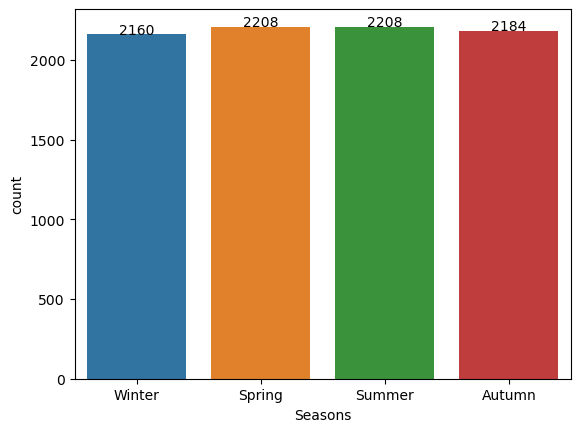

In [18]:
fig,ax = plt.subplots()
ax = sns.countplot(x='Seasons',data=data)
for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2,p.get_height()+1,p.get_height(),ha='center')

### This graph tells us that most bicycles were rented in the seasons of spring and summer .

In [19]:
data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


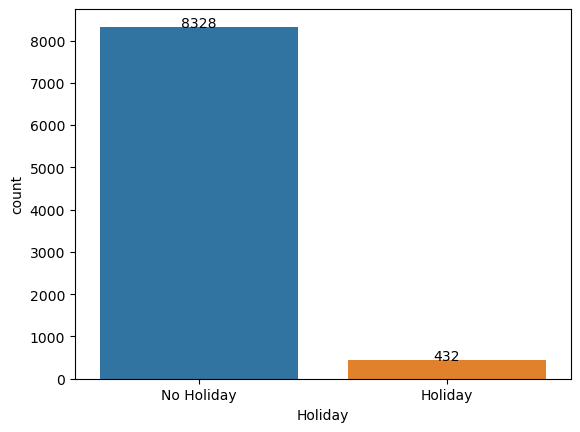

In [20]:
#let us check if the bookings were more on holidays or no holidays 
fig,ax = plt.subplots()
ax = sns.countplot(x='Holiday',data=data)
for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2,p.get_height()+1,p.get_height(),ha='center')

#### From this we can observe that the bookings were more when there was no holiday compared to days when there were holidays 

    why?

In [21]:
#let us check if it was a functional day or not 

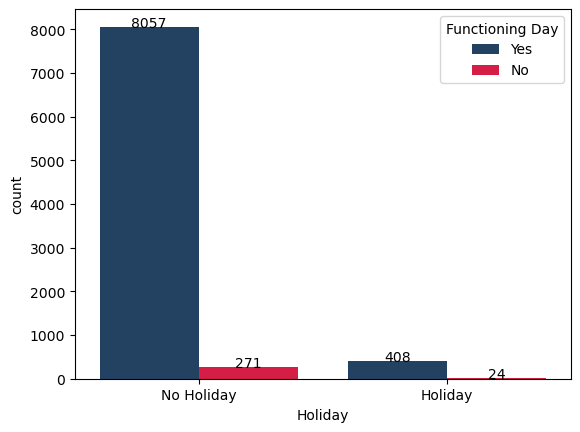

In [22]:
fig,ax = plt.subplots()
ax = sns.countplot(x='Holiday',data=data,hue='Functioning Day',palette=['#19416b','#f20034'])
for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2,p.get_height()+1,p.get_height(),ha='center')

### Here we can see that even when there were no holidays it was functioning more than the days when there were holidays .

    why?

In [23]:
data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


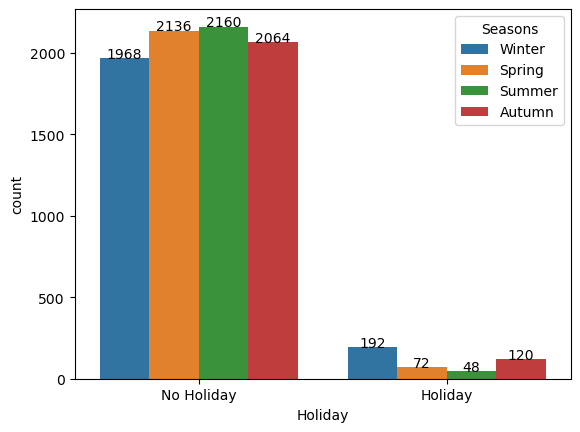

In [24]:
fig,ax = plt.subplots()
ax = sns.countplot(x='Holiday',data=data,hue='Seasons')
for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2,p.get_height()+1,p.get_height(),ha='center')

### We can see that the bookings were more in every season when there were  no holidays and the season which had the most bookings was summer in days when there were no holidays 

### On the days when there was a holiday the bookings were most in winters but im not sure about the reason need to look into it 
        
  


In [25]:
data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


#### Insights and further clarifications.

    1) We can notice that most cylce bookings were made in the summer and autumn seasons 
    2) The bookings when compared season wise arent much different why is it that summer and autumn had more bookings compared to other seasons?
    3) There were more bookings on the days when there were no holidays compared to days when there was holidays 
    4) A possible reason for the above statement maybe because a lot of people who are in the working class using cycles as means of transport or use it to make deliveires ,etc 
    5) When it was a functional day there were more boookings on those days when there was no holidays compared to days when there was a holiday 
    6) Even when there was no holiday the season with the most bookings was summer and when there was a holiday the season with the most booking was winter .

In [26]:
data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


Text(0.5, 1.0, 'Temperature vs rented bike count')

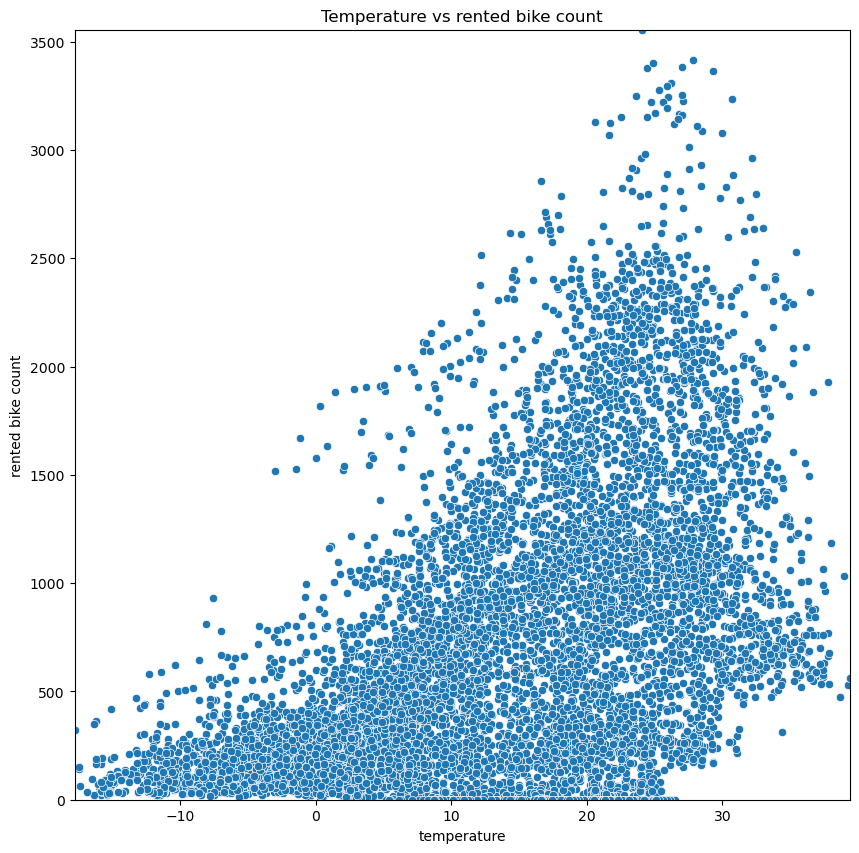

In [33]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Temperature(°C)',y='Rented Bike Count',data=data)
plt.xlabel('temperature')
plt.ylabel('rented bike count')
plt.xlim([-17.8,39.4])
plt.ylim([0,3556])
plt.title('Temperature vs rented bike count')

## Here the scatter plot tells us that more bookings were between 20 to 30 degrees because the bike counts increase as the temperature increase. 

In [34]:
data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [35]:
data['Rainfall(mm)'].min(),data['Rainfall(mm)'].max()

(0.0, 35.0)

(0.0, 35.0)

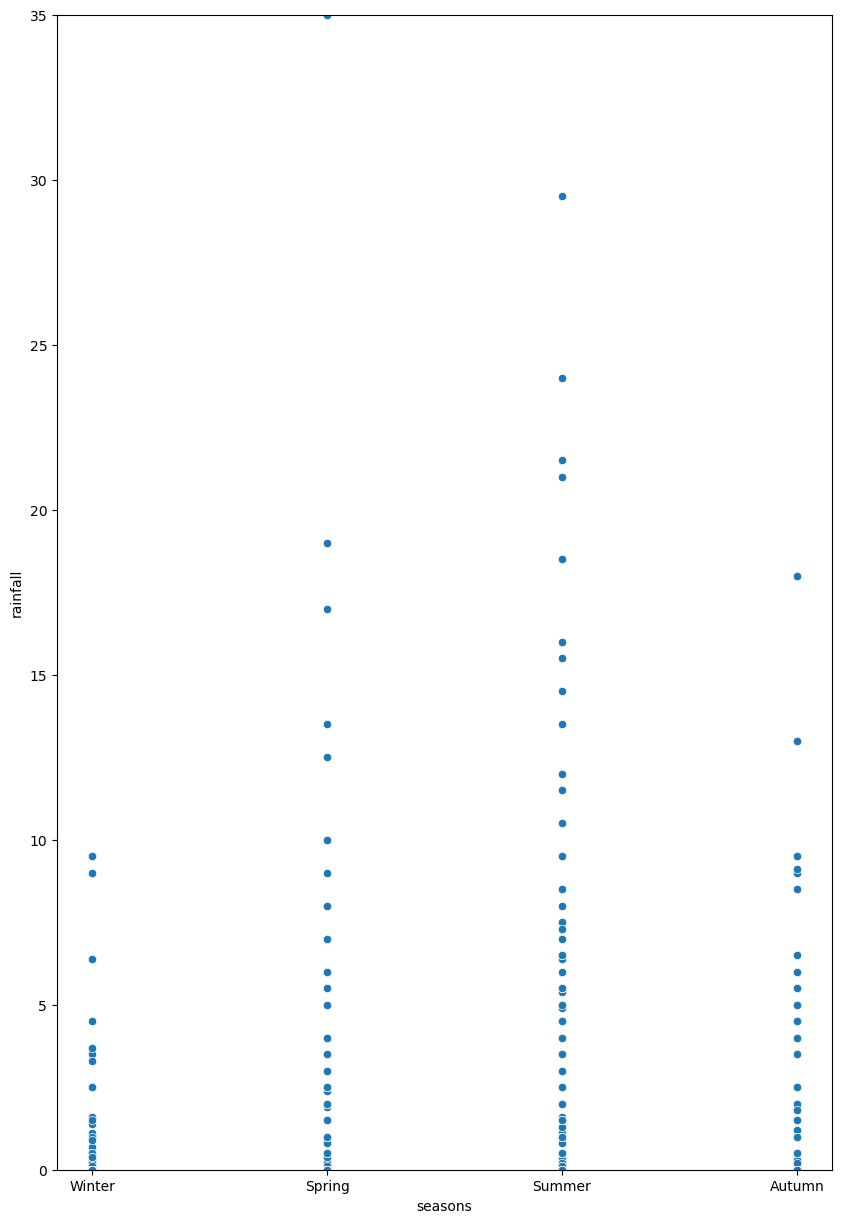

In [36]:
plt.figure(figsize=(10,15))
sns.scatterplot(x='Seasons',y='Rainfall(mm)',data=data)
plt.xlabel('seasons')
plt.ylabel('rainfall')
plt.ylim([0,35])


### Observations 
    1) Here we can see that the highest recorded rainfall was in the spring season .
    2)The second highest was summer .

(0.0, 35.0)

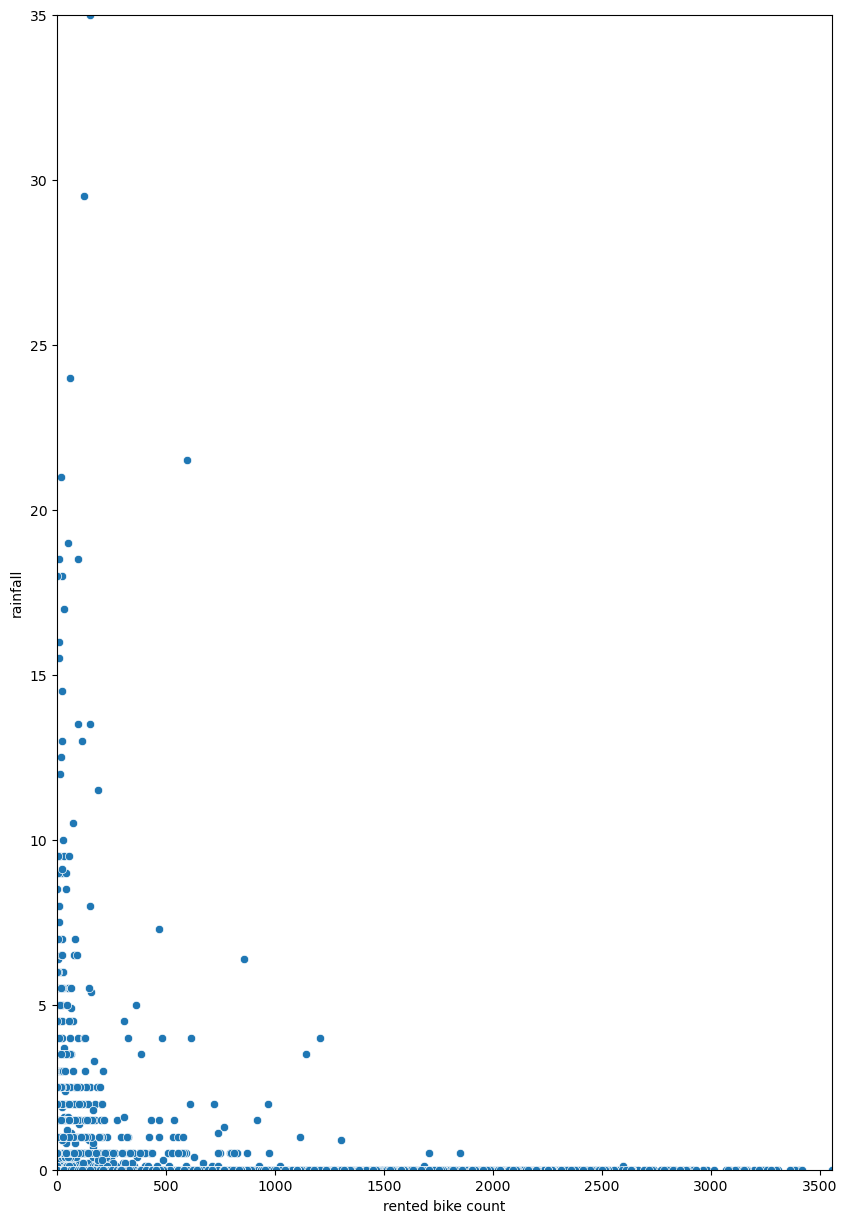

In [37]:
plt.figure(figsize=(10,15))
sns.scatterplot(x='Rented Bike Count',y='Rainfall(mm)',data=data)
plt.xlabel('rented bike count')
plt.ylabel('rainfall')
plt.xlim([0,3556])
plt.ylim([0,35])

### Here we can see that most rented bikes was when rainfall was between 0 and 5 to be precise and there was someone who rented the bike even when rainfall was more than 35 hats off inspiration

In [38]:
data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


Text(0.5, 1.0, 'seasons vs rented bike count')

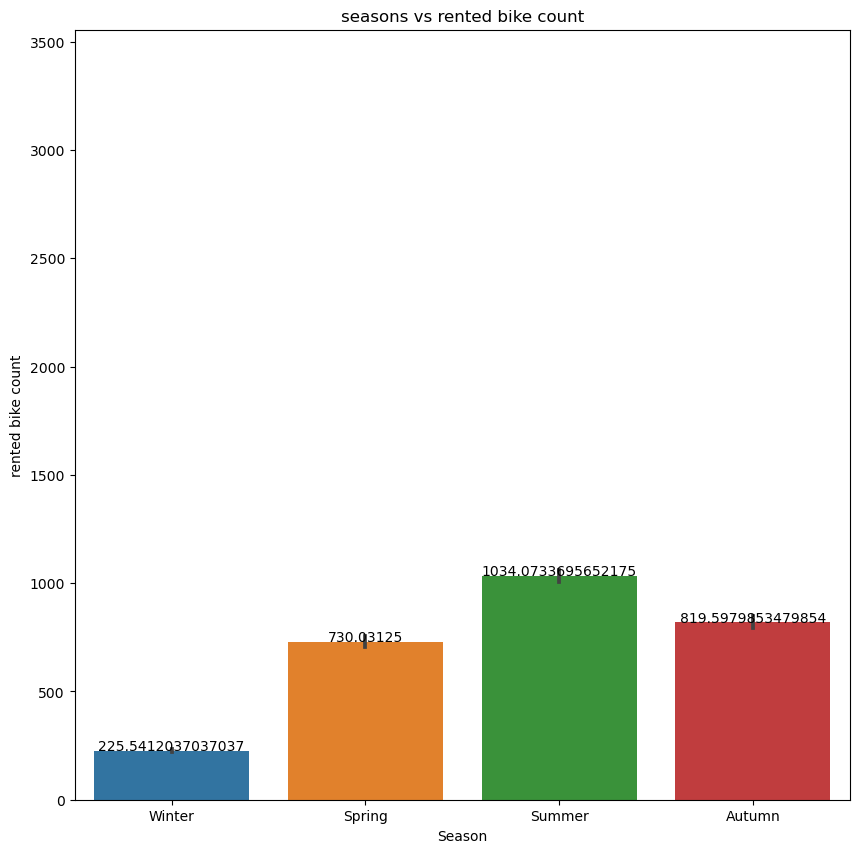

In [39]:
fig,ax=plt.subplots(figsize=(10,10))
ax = sns.barplot(x='Seasons',y='Rented Bike Count',data=data)
for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2,p.get_height()+1,p.get_height(),ha='center')
plt.xlabel('Season')
plt.ylabel('rented bike count')
plt.ylim([0,3556])
plt.title('seasons vs rented bike count')

### Now we will dig deep into the outliers section we will check for outliers using two methods .
    1) Box plots
    2) Interquartile range method

C:\Users\mailt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mailt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mailt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mailt\anaconda3\lib\si

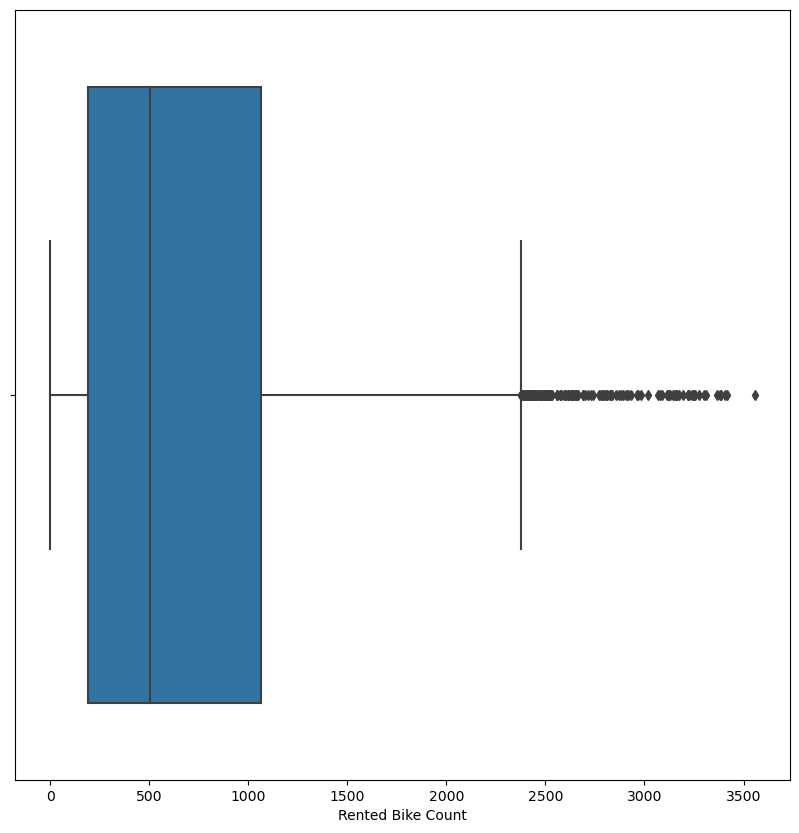

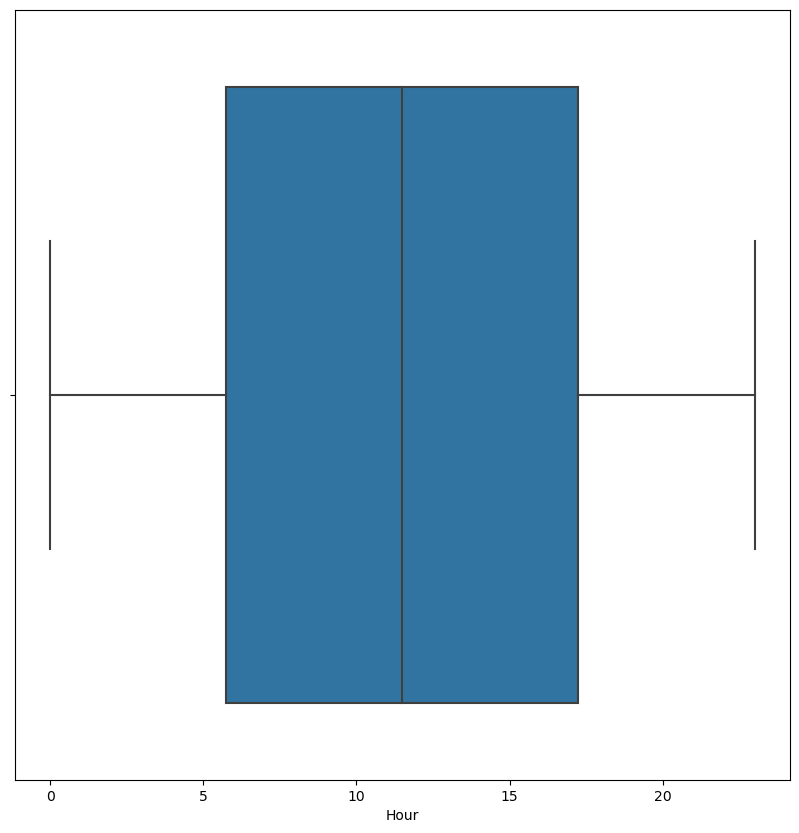

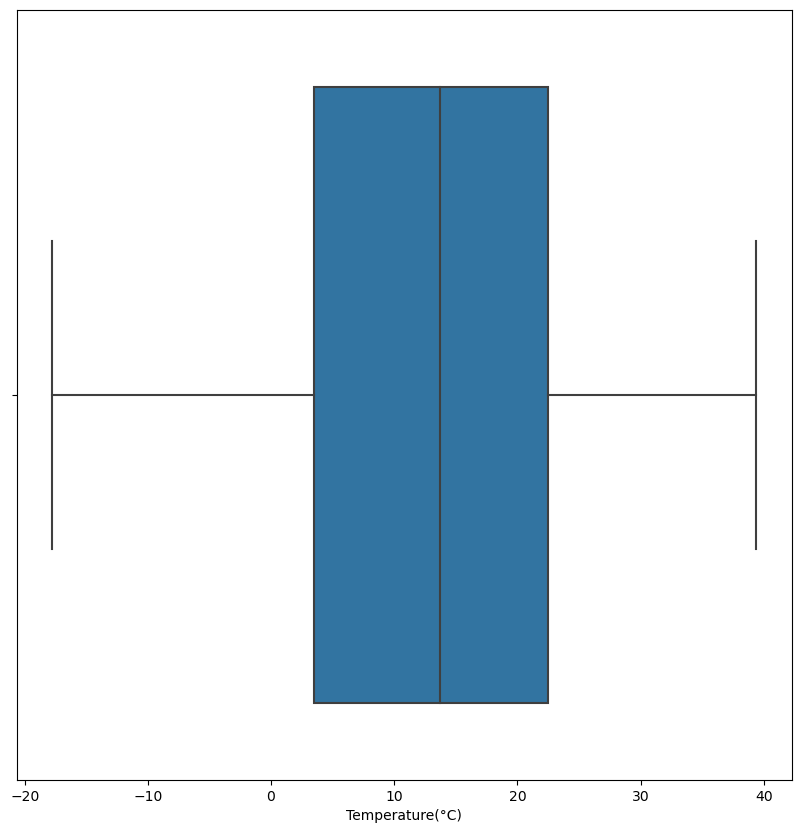

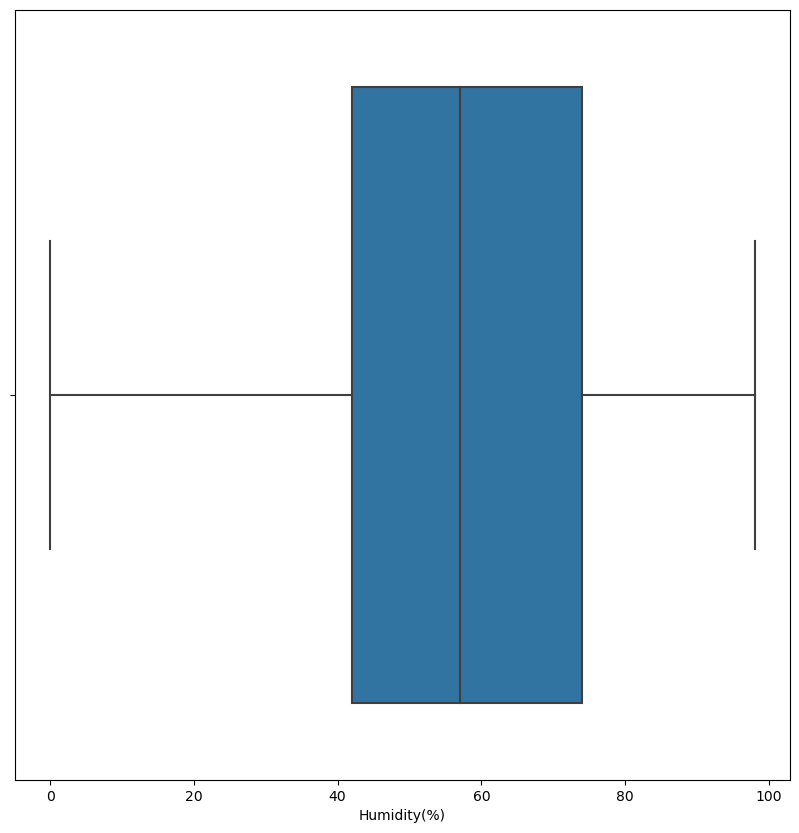

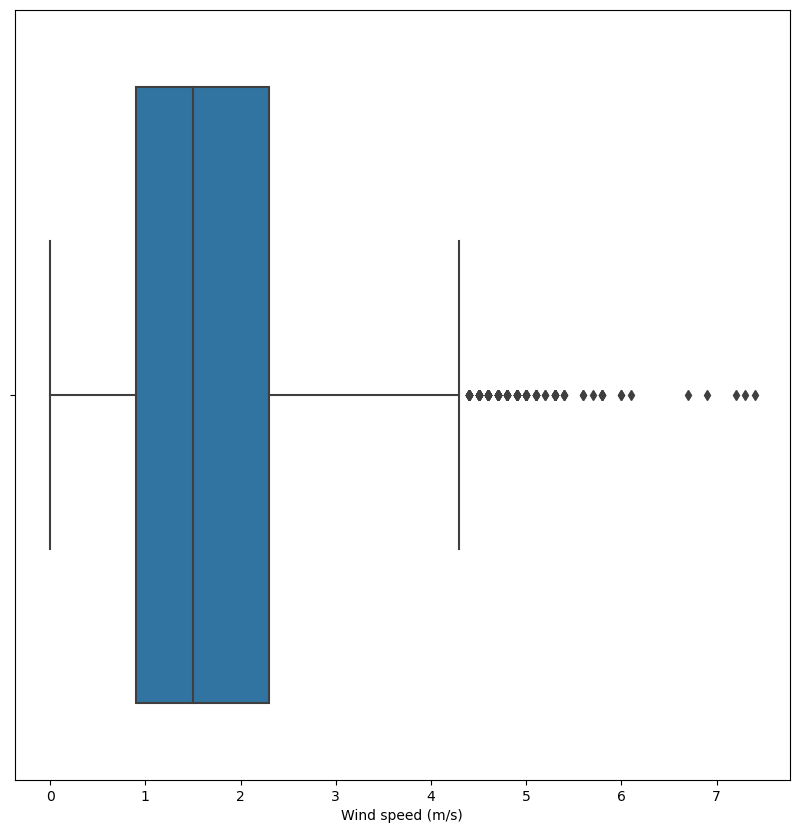

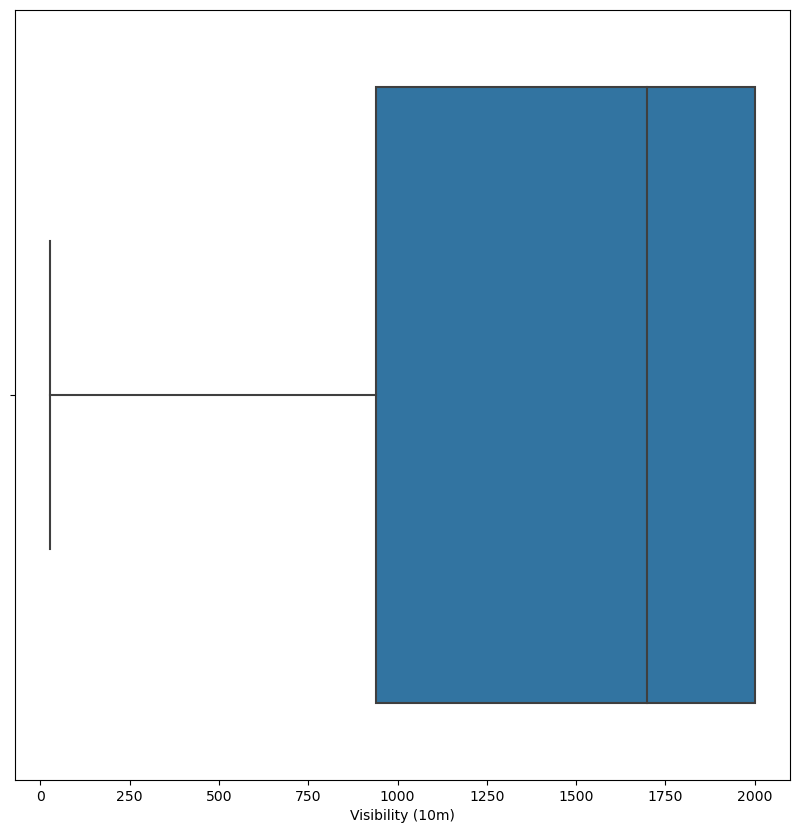

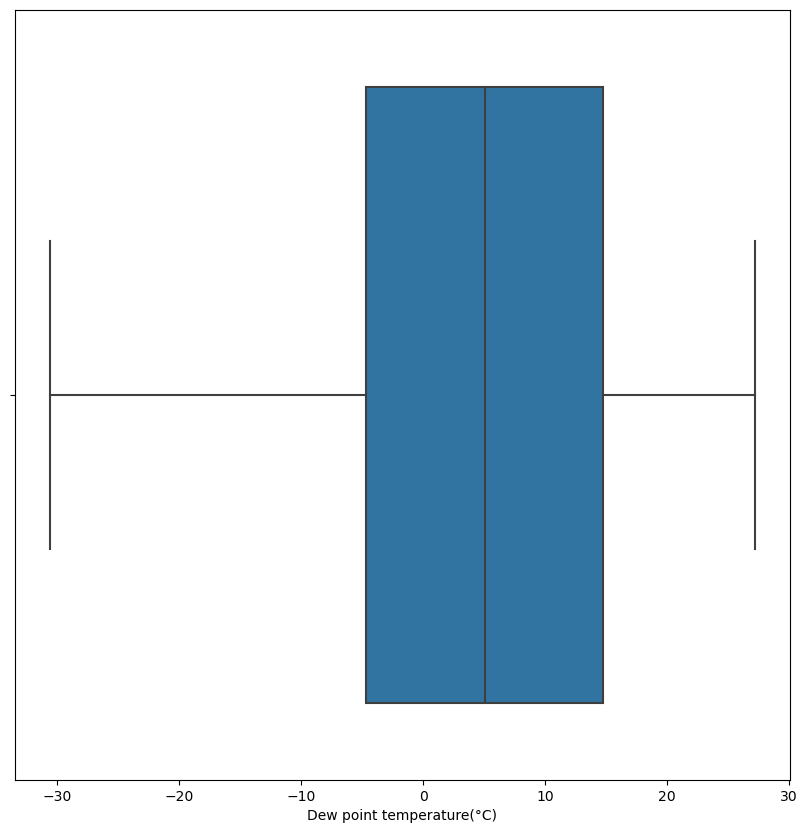

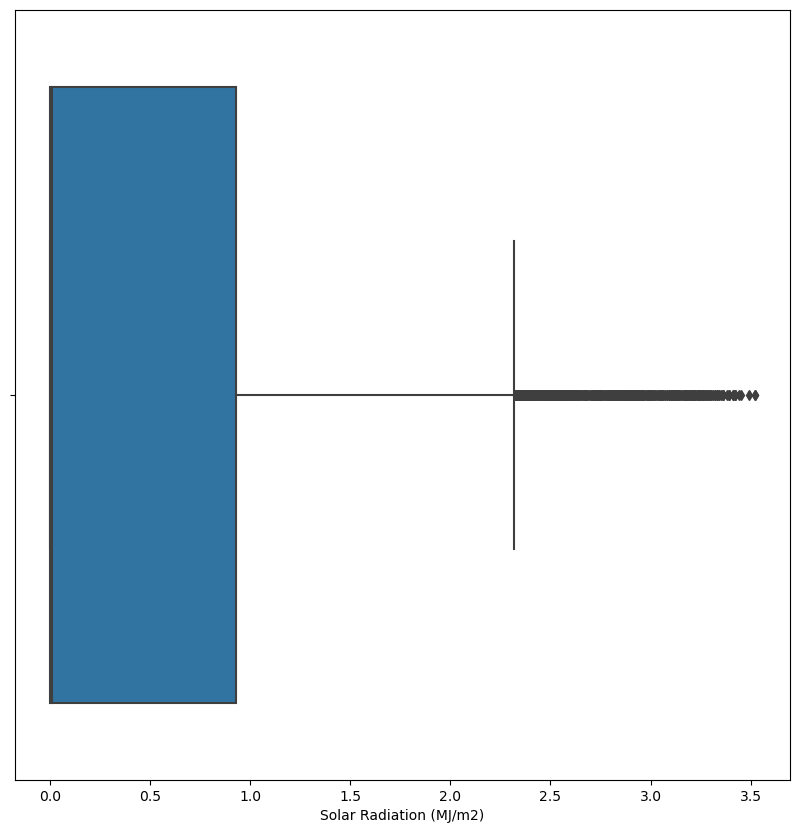

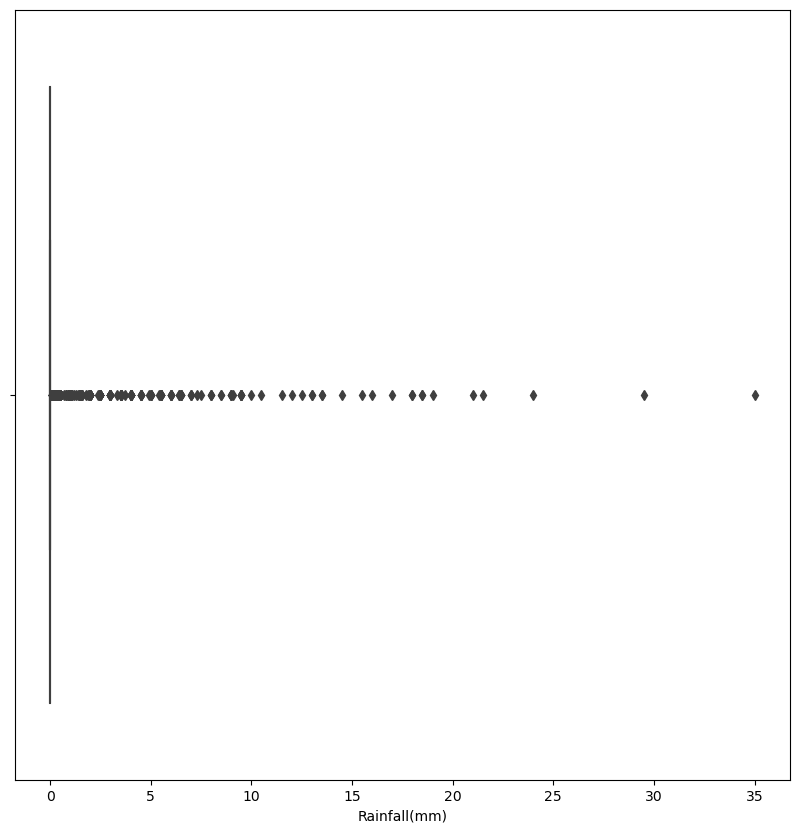

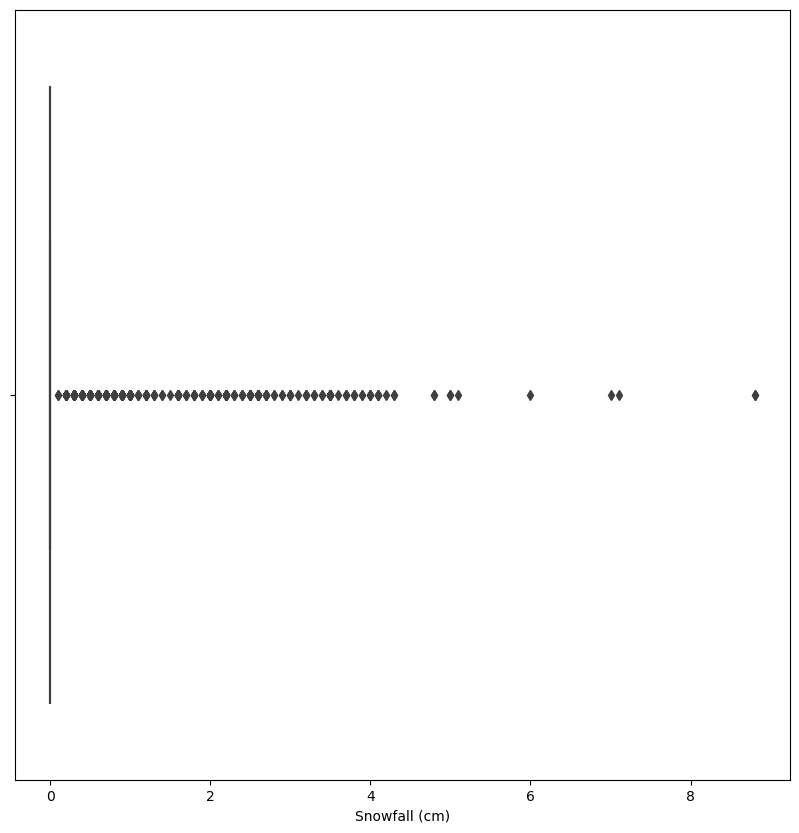

In [40]:
#let us plot some boxplots 
for c in data.describe().columns:
    fig,ax = plt.subplots(figsize=(10,10))
    ax = sns.boxplot(data[c])


In [41]:
#are there any missing values?
data.isna().sum()
#nope there are no missing values .

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

## There are no missing values in our data set which is good. Let us proceed further

In [42]:
def remove_outliers_IQR(df):
    """
    Remove outliers from a column of a pandas DataFrame using the IQR method.
    
    Parameters:
    df (pandas DataFrame): The input DataFrame.
    col_name (string): The name of the column to remove outliers from.
    threshold (float): The threshold to determine outliers.
    
    Returns:
    A pandas DataFrame with outliers removed
    """
    for c in df.describe().columns:
        arr=  np.array(df[c])
        sorted_array=np.sort(arr)
        q1, q3 = np.percentile(sorted_array, [25, 75])
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        df_cleaned = df[(df[c] >= lower_bound) & (df[c] <= upper_bound)]
    return df_cleaned


In [43]:
data
#HERE WE OBSERVEVE WE HAVE 8760 ROWS ORS SAMPLES

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [44]:
data_removed_out=remove_outliers_IQR(data)

In [45]:
data_removed_out

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


## As we can observe here we have lost quite a bit of samples here but we have removed outliers.

### Let us check this using box plots 


In [46]:
len(data.columns)

14

In [47]:
len(data.describe().columns)

10

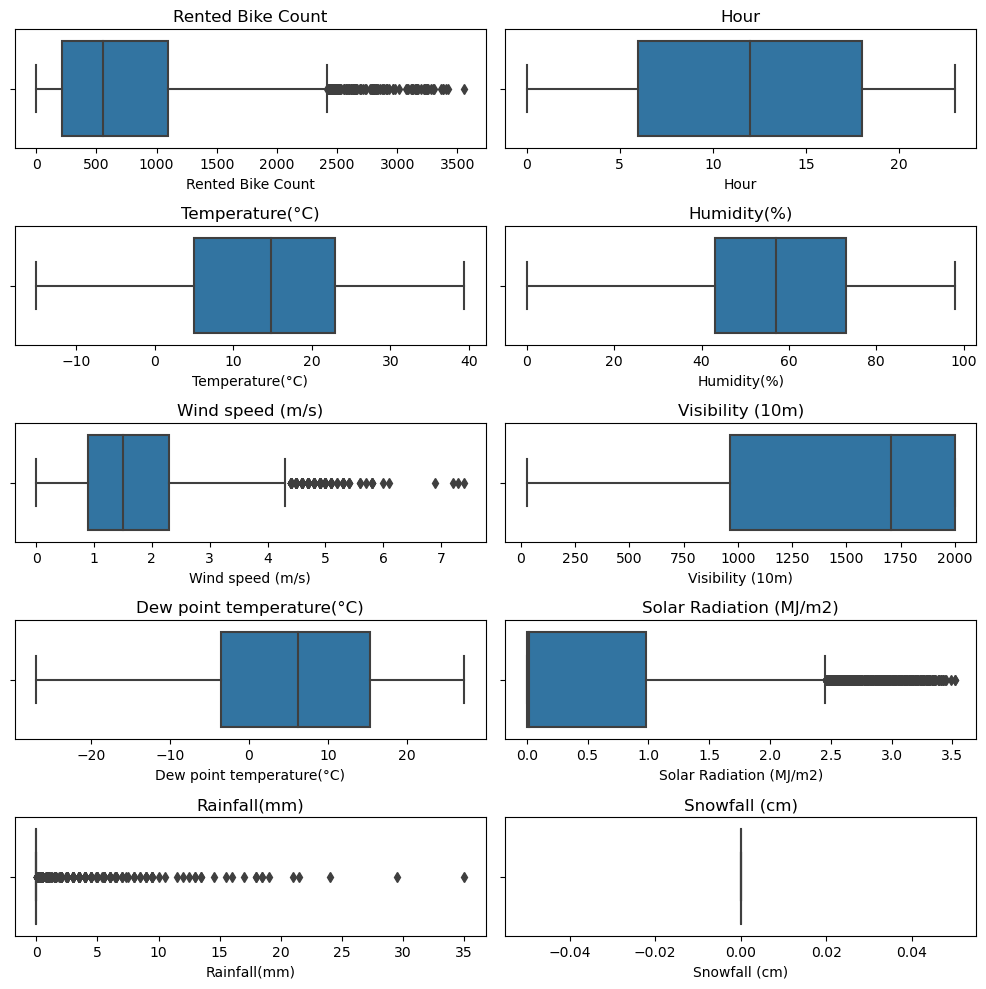

In [48]:
fig,ax = plt.subplots(nrows=5,ncols=2,figsize=(10,10))
ax  = ax.flatten()#converts code into 1d array 
for i,j in enumerate(data_removed_out.describe().columns):#here we are using the enumerate function 
    sns.boxplot(x=j,data=data_removed_out,ax=ax[i])
    ax[i].set_title(j)
plt.tight_layout()

#### Observations- 
* Here our function wasnt able to capture all outliers im not exactly sure maybe because of the threshold value being 1.5 
* But to keep in mind if we increase our threshold value it may result in loss of information and might impact the accuracy of our model.

In [49]:
#let us start off with some data preperation / data pre processing 

## We know that we need to follow certain assumptions while doing linear regression -- 
    1)Linear assumption between dependent and independent variables
    2)Multivariate normality 
    3)Homoscadacity 
    4)No multicolinearity and removal of multicolinearity using variance inflation factor

In [50]:
#linear assumption

In [51]:
data_removed_out.describe().columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

In [52]:
#here we will be checking if there is a linear assumption between independent and dependent variable.

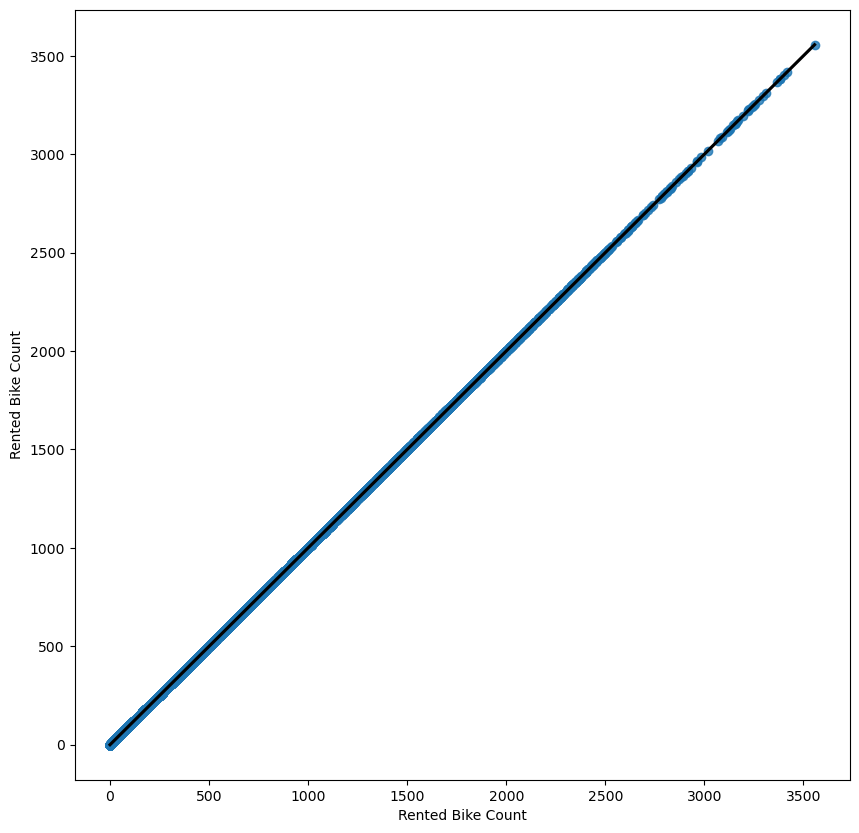

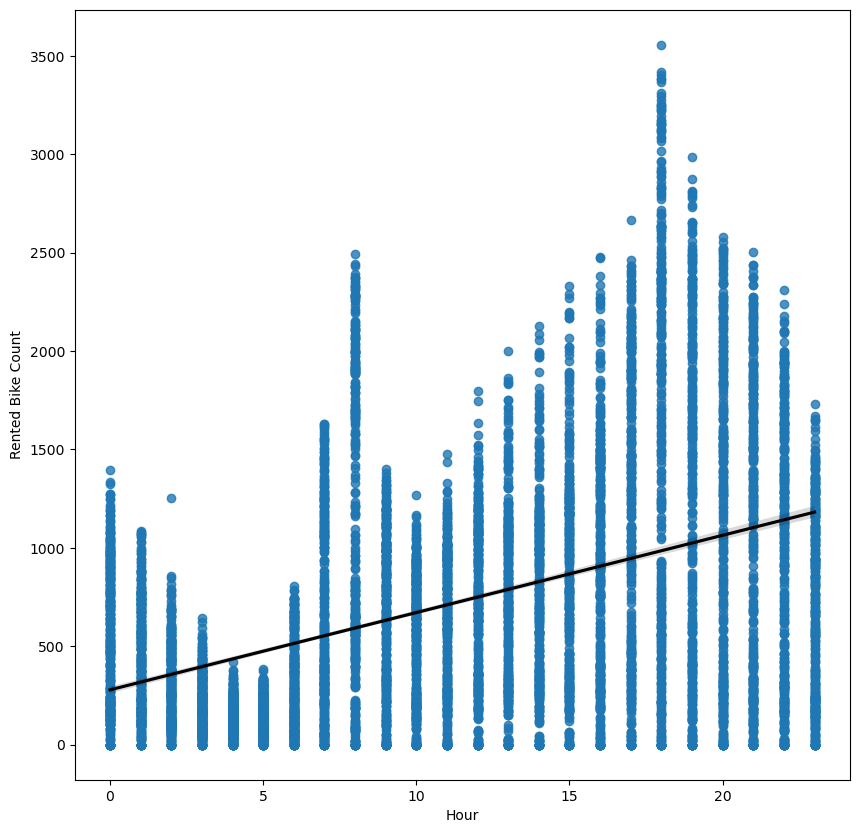

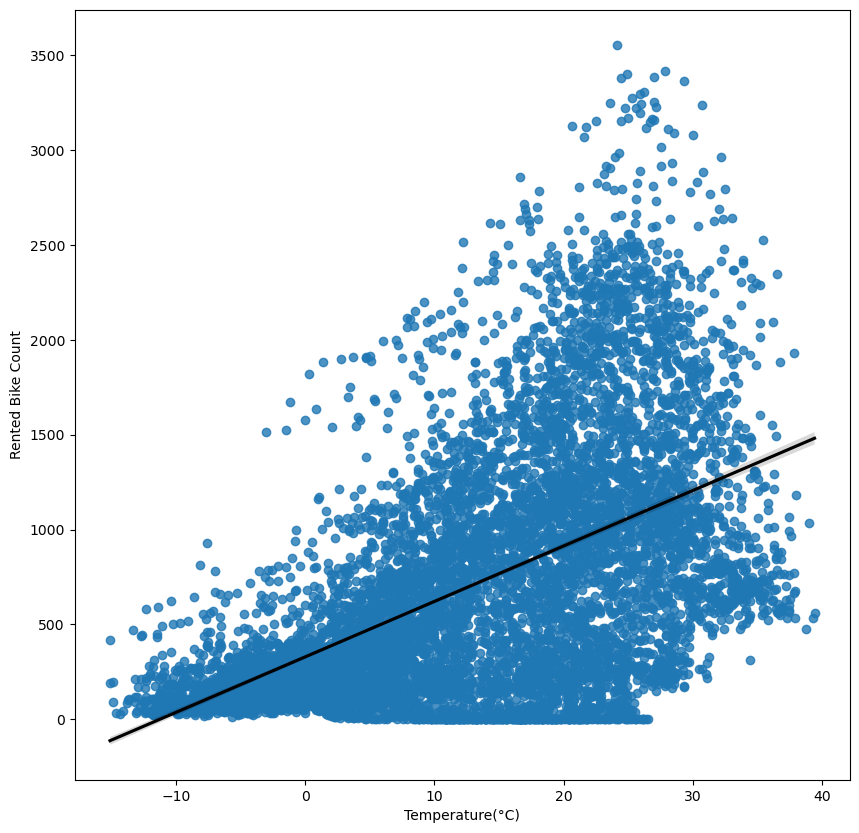

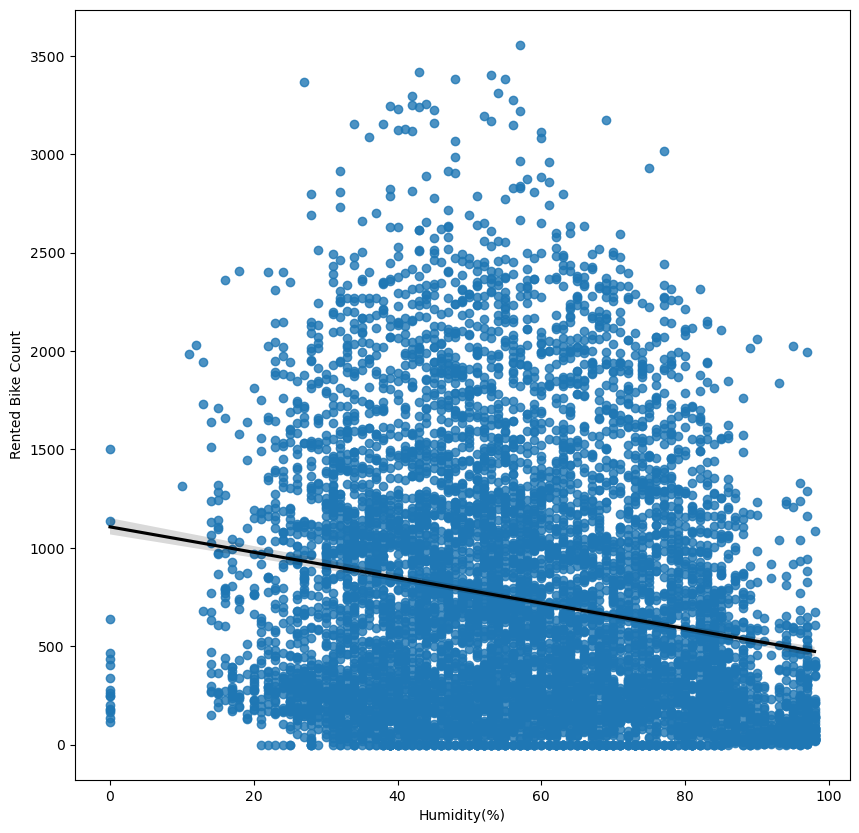

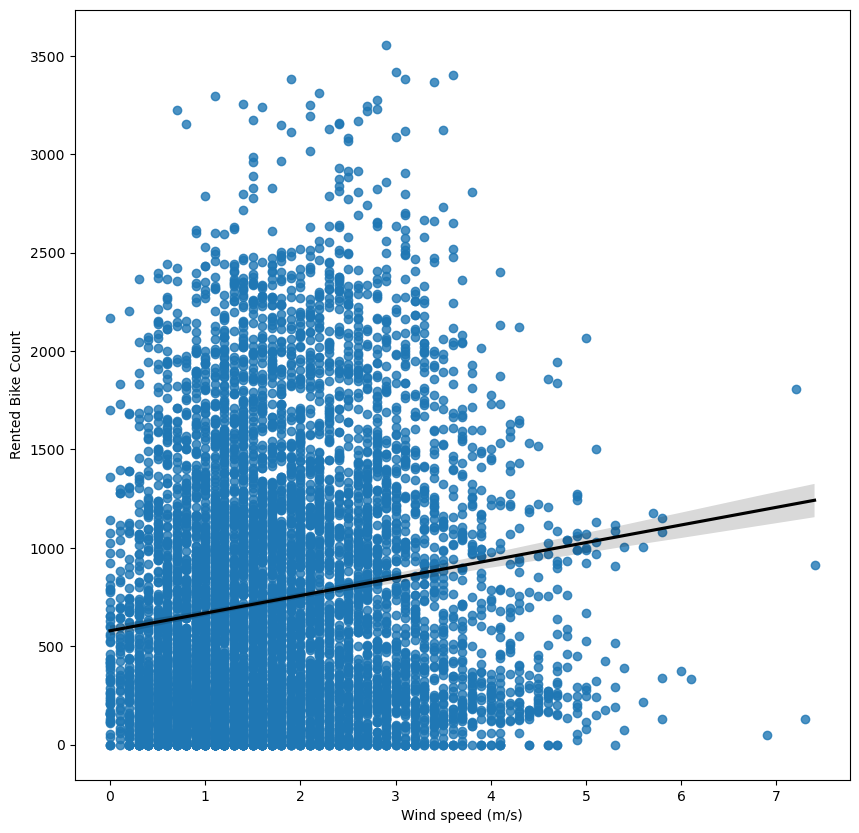

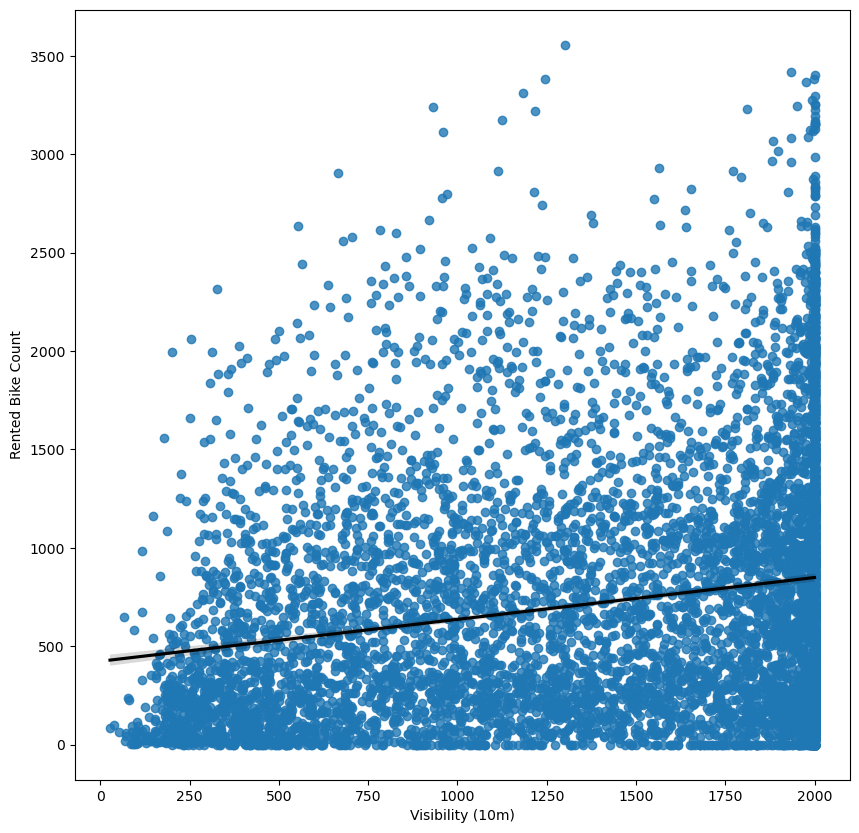

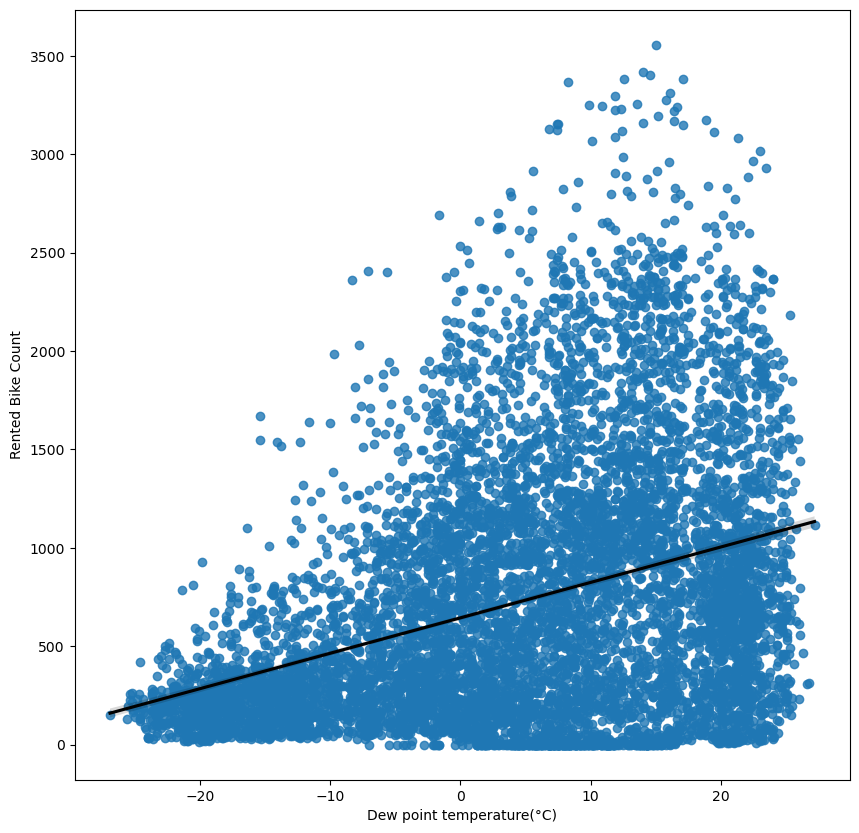

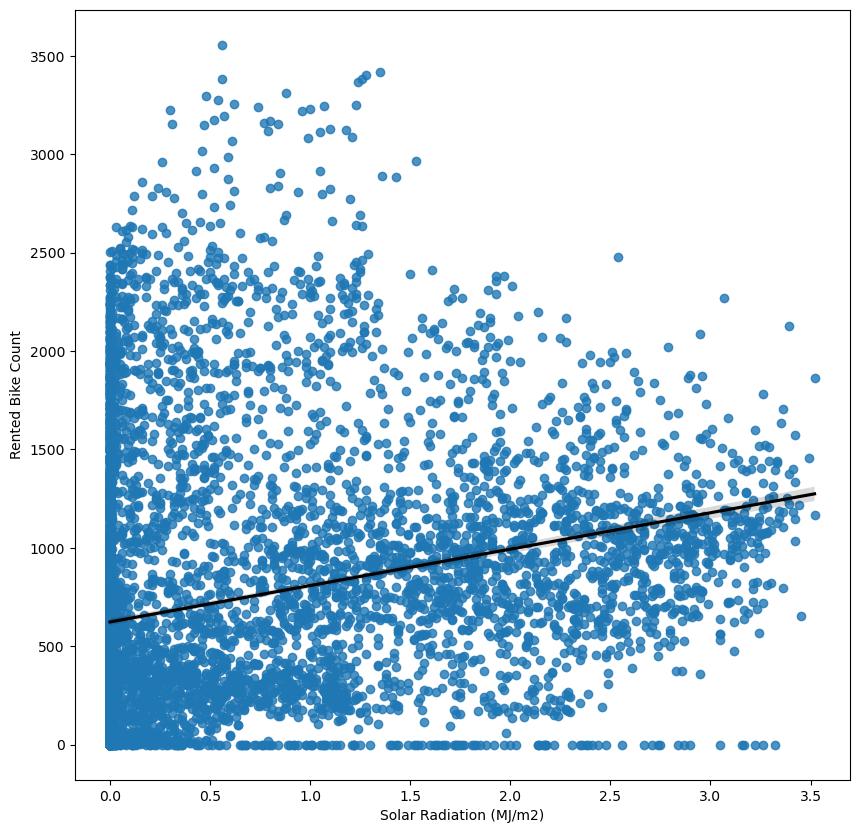

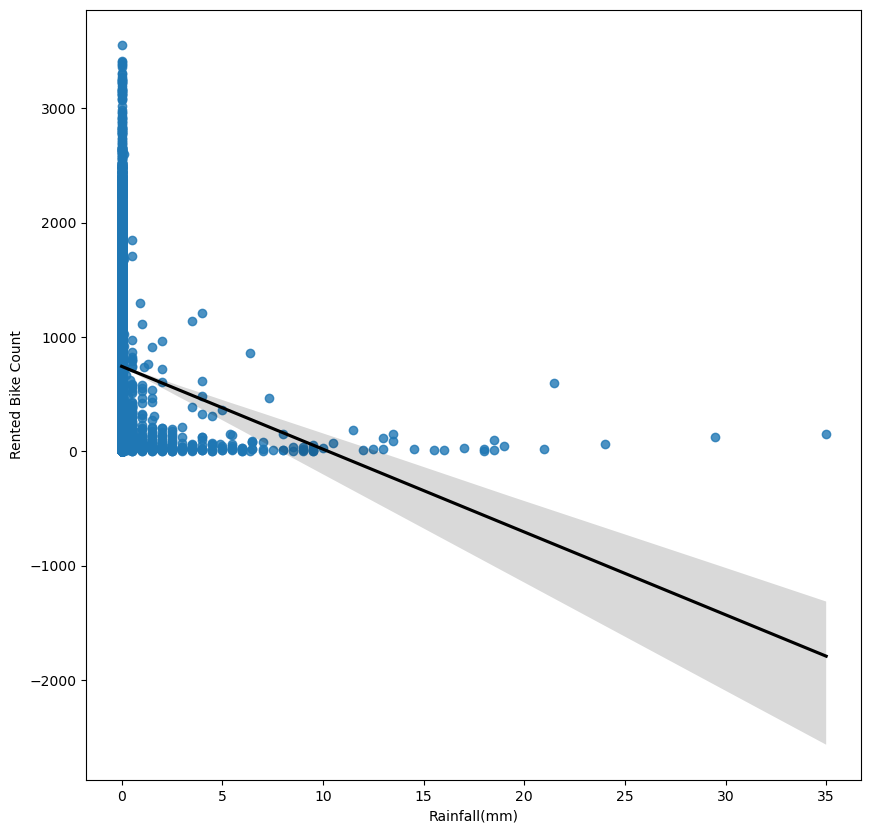

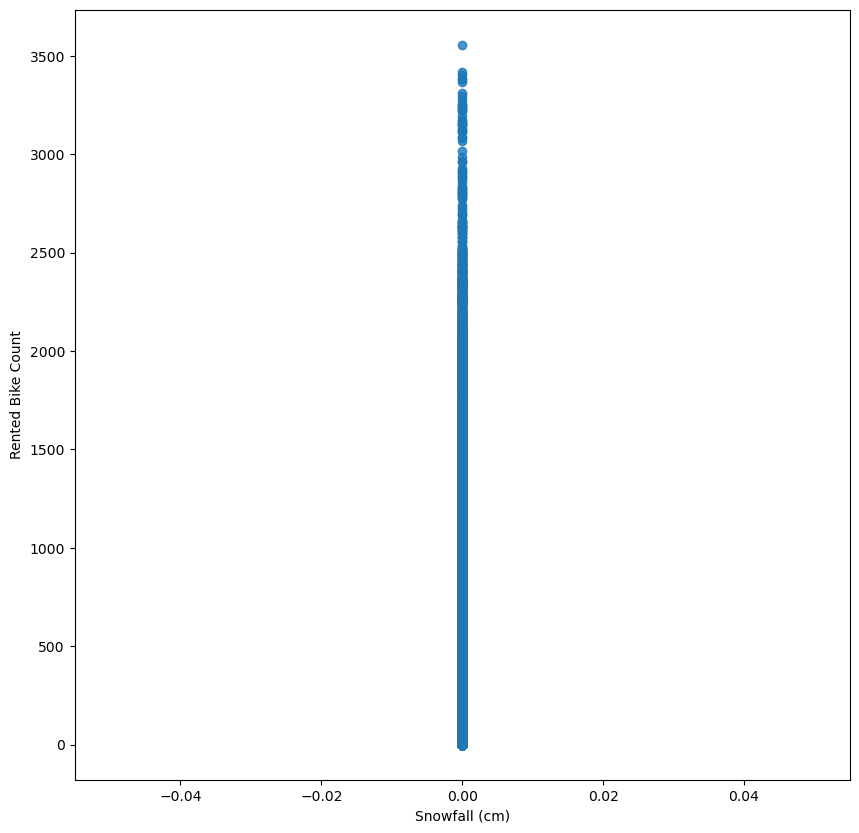

In [53]:
for c in data_removed_out.describe().columns:
    fig,ax= plt.subplots(figsize=(10,10))
    ax=sns.regplot(x=c,y='Rented Bike Count',data=data_removed_out,line_kws={'color': 'black'})
    

#### It is safe to assume that all the independent features have a linear relationship with dependent variable.

In [54]:
data.describe().columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

### first let us check for multicolinearity we will define a function for multicolinearity 
    1) We will be using this variance inflation factor to get rid of columns mainly independent coliumns that are higihly correlated
    2) We will see which columns have better influence on the dependent variable .

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def check_vif(X):
    vif = pd.DataFrame()#we have declared an empty dataframe.
    vif['features'] = X.columns#we are adding columns to our dataframe
    vif['Vif'] = [variance_inflation_factor(X.values,i)for i in range (X.shape[1])]#this functino here calculates the variance inflation factor for each and every feature 
    return vif

In [56]:
new_variables=check_vif(data_removed_out[[i for i in data_removed_out.describe().columns if i not in ['Humidity(%)','Dew point temperature(°C)','Snowfall (cm)']]])
new_variables

,features,Vif
0,Rented Bike Count,3.952309
1,Hour,4.537163
2,Temperature(°C),3.418988
3,Wind speed (m/s),4.307414
4,Visibility (10m),4.284969
5,Solar Radiation (MJ/m2),1.883296
6,Rainfall(mm),1.080310


In [57]:
###these are the variables we will be using to train our model.

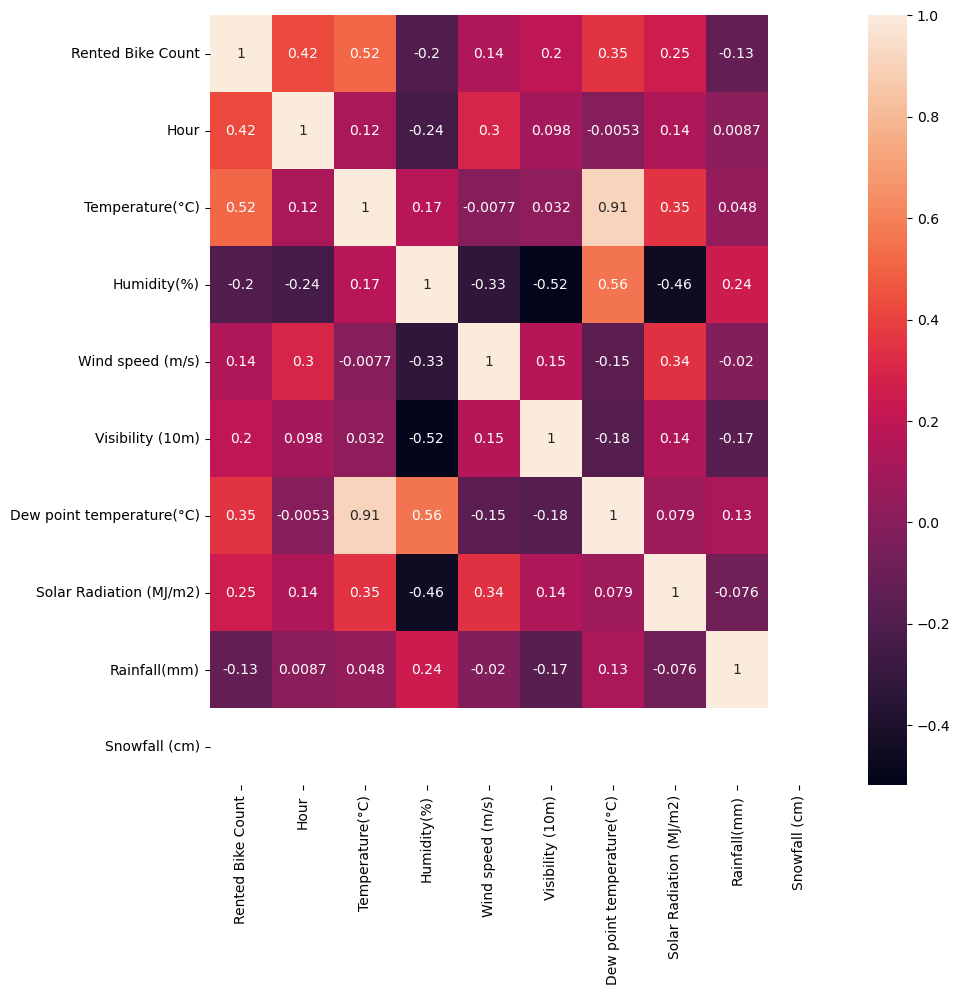

In [58]:
corr_mat = data_removed_out.corr()
fig,ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(corr_mat,annot=True)

In [59]:
##let us remove those features
data_removed_out.drop('Humidity(%)',axis=1,inplace=True)

C:\Users\mailt\AppData\Local\Temp\ipykernel_17404\1005609839.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_removed_out.drop('Humidity(%)',axis=1,inplace=True)


In [60]:
data_removed_out.drop('Dew point temperature(°C)',axis=1,inplace=True)

C:\Users\mailt\AppData\Local\Temp\ipykernel_17404\3133265308.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_removed_out.drop('Dew point temperature(°C)',axis=1,inplace=True)


In [61]:
data_removed_out.drop('Snowfall (cm)',axis=1,inplace=True)

C:\Users\mailt\AppData\Local\Temp\ipykernel_17404\3531889645.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_removed_out.drop('Snowfall (cm)',axis=1,inplace=True)


In [62]:
data_removed_out

,Date,Rented Bike Count,Hour,Temperature(°C),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,2.2,2000,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,0.8,2000,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,1.0,2000,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,0.9,2000,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,2.3,2000,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,2.6,1894,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,2.3,2000,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,0.3,1968,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,1.0,1859,0.0,0.0,Autumn,No Holiday,Yes


In [63]:
## We will be using the above column for building our regression model.

# FEATURE ENGINEERING.

### We have to perfrom feature encoding on these columns lets talk about what feature encoding is 
    * Feature encoding - This refers to the technique by which categorical columns are converted into numerical columns because machine learning models cannot deal with object or categorical data it only understands numberss.

In [64]:
data_removed_out

,Date,Rented Bike Count,Hour,Temperature(°C),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,2.2,2000,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,0.8,2000,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,1.0,2000,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,0.9,2000,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,2.3,2000,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,2.6,1894,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,2.3,2000,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,0.3,1968,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,1.0,1859,0.0,0.0,Autumn,No Holiday,Yes


In [65]:
#let us create some dummy varaibles.
data_removed_out['WinterSeason'] = np.where(data_removed_out['Seasons']=='Winter',1,0)
data_removed_out['SummerSeason'] = np.where(data_removed_out['Seasons']=='Summer',1,0)
data_removed_out['AutumnSeason'] = np.where(data_removed_out['Seasons']=='Autumn',1,0)
data_removed_out['SpringSeason'] = np.where(data_removed_out['Seasons']=='Spring',1,0)

C:\Users\mailt\AppData\Local\Temp\ipykernel_17404\2708832621.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_removed_out['WinterSeason'] = np.where(data_removed_out['Seasons']=='Winter',1,0)
C:\Users\mailt\AppData\Local\Temp\ipykernel_17404\2708832621.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_removed_out['SummerSeason'] = np.where(data_removed_out['Seasons']=='Summer',1,0)
C:\Users\mailt\AppData\Local\Temp\ipykernel_17404\2708832621.py:4: SettingWithCopyWarning: 
A value is trying to

In [66]:
data_removed_out

,Date,Rented Bike Count,Hour,Temperature(°C),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Seasons,Holiday,Functioning Day,WinterSeason,SummerSeason,AutumnSeason,SpringSeason
0,01/12/2017,254,0,-5.2,2.2,2000,0.0,0.0,Winter,No Holiday,Yes,1,0,0,0
1,01/12/2017,204,1,-5.5,0.8,2000,0.0,0.0,Winter,No Holiday,Yes,1,0,0,0
2,01/12/2017,173,2,-6.0,1.0,2000,0.0,0.0,Winter,No Holiday,Yes,1,0,0,0
3,01/12/2017,107,3,-6.2,0.9,2000,0.0,0.0,Winter,No Holiday,Yes,1,0,0,0
4,01/12/2017,78,4,-6.0,2.3,2000,0.0,0.0,Winter,No Holiday,Yes,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,2.6,1894,0.0,0.0,Autumn,No Holiday,Yes,0,0,1,0
8756,30/11/2018,764,20,3.4,2.3,2000,0.0,0.0,Autumn,No Holiday,Yes,0,0,1,0
8757,30/11/2018,694,21,2.6,0.3,1968,0.0,0.0,Autumn,No Holiday,Yes,0,0,1,0
8758,30/11/2018,712,22,2.1,1.0,1859,0.0,0.0,Autumn,No Holiday,Yes,0,0,1,0


In [67]:
#let us drop the seasons column
data_removed_out.drop('Seasons',axis=1,inplace=True)

C:\Users\mailt\AppData\Local\Temp\ipykernel_17404\1256763729.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_removed_out.drop('Seasons',axis=1,inplace=True)


In [68]:
#let us view the data frame again
data_removed_out

,Date,Rented Bike Count,Hour,Temperature(°C),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Holiday,Functioning Day,WinterSeason,SummerSeason,AutumnSeason,SpringSeason
0,01/12/2017,254,0,-5.2,2.2,2000,0.0,0.0,No Holiday,Yes,1,0,0,0
1,01/12/2017,204,1,-5.5,0.8,2000,0.0,0.0,No Holiday,Yes,1,0,0,0
2,01/12/2017,173,2,-6.0,1.0,2000,0.0,0.0,No Holiday,Yes,1,0,0,0
3,01/12/2017,107,3,-6.2,0.9,2000,0.0,0.0,No Holiday,Yes,1,0,0,0
4,01/12/2017,78,4,-6.0,2.3,2000,0.0,0.0,No Holiday,Yes,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,2.6,1894,0.0,0.0,No Holiday,Yes,0,0,1,0
8756,30/11/2018,764,20,3.4,2.3,2000,0.0,0.0,No Holiday,Yes,0,0,1,0
8757,30/11/2018,694,21,2.6,0.3,1968,0.0,0.0,No Holiday,Yes,0,0,1,0
8758,30/11/2018,712,22,2.1,1.0,1859,0.0,0.0,No Holiday,Yes,0,0,1,0


In [69]:
data_removed_out['Functioning Day'].value_counts()

Yes    8022
No      295
Name: Functioning Day, dtype: int64

In [70]:
data_removed_out['yes_Functioning'] = np.where(data_removed_out['Functioning Day']=='Yes',1,0)
data_removed_out['no_functioning'] = np.where(data_removed_out['Functioning Day']=='No',1,0)


C:\Users\mailt\AppData\Local\Temp\ipykernel_17404\3570986076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_removed_out['yes_Functioning'] = np.where(data_removed_out['Functioning Day']=='Yes',1,0)
C:\Users\mailt\AppData\Local\Temp\ipykernel_17404\3570986076.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_removed_out['no_functioning'] = np.where(data_removed_out['Functioning Day']=='No',1,0)


In [71]:
data_removed_out

,Date,Rented Bike Count,Hour,Temperature(°C),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Holiday,Functioning Day,WinterSeason,SummerSeason,AutumnSeason,SpringSeason,yes_Functioning,no_functioning
0,01/12/2017,254,0,-5.2,2.2,2000,0.0,0.0,No Holiday,Yes,1,0,0,0,1,0
1,01/12/2017,204,1,-5.5,0.8,2000,0.0,0.0,No Holiday,Yes,1,0,0,0,1,0
2,01/12/2017,173,2,-6.0,1.0,2000,0.0,0.0,No Holiday,Yes,1,0,0,0,1,0
3,01/12/2017,107,3,-6.2,0.9,2000,0.0,0.0,No Holiday,Yes,1,0,0,0,1,0
4,01/12/2017,78,4,-6.0,2.3,2000,0.0,0.0,No Holiday,Yes,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,2.6,1894,0.0,0.0,No Holiday,Yes,0,0,1,0,1,0
8756,30/11/2018,764,20,3.4,2.3,2000,0.0,0.0,No Holiday,Yes,0,0,1,0,1,0
8757,30/11/2018,694,21,2.6,0.3,1968,0.0,0.0,No Holiday,Yes,0,0,1,0,1,0
8758,30/11/2018,712,22,2.1,1.0,1859,0.0,0.0,No Holiday,Yes,0,0,1,0,1,0


In [72]:
#let us remove the functioning day column
data_removed_out.drop('Functioning Day',axis=1,inplace=True)

C:\Users\mailt\AppData\Local\Temp\ipykernel_17404\2652859012.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_removed_out.drop('Functioning Day',axis=1,inplace=True)


In [73]:
data_removed_out

,Date,Rented Bike Count,Hour,Temperature(°C),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Holiday,WinterSeason,SummerSeason,AutumnSeason,SpringSeason,yes_Functioning,no_functioning
0,01/12/2017,254,0,-5.2,2.2,2000,0.0,0.0,No Holiday,1,0,0,0,1,0
1,01/12/2017,204,1,-5.5,0.8,2000,0.0,0.0,No Holiday,1,0,0,0,1,0
2,01/12/2017,173,2,-6.0,1.0,2000,0.0,0.0,No Holiday,1,0,0,0,1,0
3,01/12/2017,107,3,-6.2,0.9,2000,0.0,0.0,No Holiday,1,0,0,0,1,0
4,01/12/2017,78,4,-6.0,2.3,2000,0.0,0.0,No Holiday,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,2.6,1894,0.0,0.0,No Holiday,0,0,1,0,1,0
8756,30/11/2018,764,20,3.4,2.3,2000,0.0,0.0,No Holiday,0,0,1,0,1,0
8757,30/11/2018,694,21,2.6,0.3,1968,0.0,0.0,No Holiday,0,0,1,0,1,0
8758,30/11/2018,712,22,2.1,1.0,1859,0.0,0.0,No Holiday,0,0,1,0,1,0


In [74]:
data_removed_out['Holiday'].value_counts()

No Holiday    7910
Holiday        407
Name: Holiday, dtype: int64

In [75]:
#let us create dummy variables for this column as well
data_removed_out['yes_hoiday'] = np.where(data_removed_out['Holiday']=='Holiday',1,0)
data_removed_out['no_holiday'] = np.where(data_removed_out['Holiday']=='No Holiday',1,0)

C:\Users\mailt\AppData\Local\Temp\ipykernel_17404\3770074401.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_removed_out['yes_hoiday'] = np.where(data_removed_out['Holiday']=='Holiday',1,0)
C:\Users\mailt\AppData\Local\Temp\ipykernel_17404\3770074401.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_removed_out['no_holiday'] = np.where(data_removed_out['Holiday']=='No Holiday',1,0)


In [76]:
#let us view the dataframe
data_removed_out

,Date,Rented Bike Count,Hour,Temperature(°C),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Holiday,WinterSeason,SummerSeason,AutumnSeason,SpringSeason,yes_Functioning,no_functioning,yes_hoiday,no_holiday
0,01/12/2017,254,0,-5.2,2.2,2000,0.0,0.0,No Holiday,1,0,0,0,1,0,0,1
1,01/12/2017,204,1,-5.5,0.8,2000,0.0,0.0,No Holiday,1,0,0,0,1,0,0,1
2,01/12/2017,173,2,-6.0,1.0,2000,0.0,0.0,No Holiday,1,0,0,0,1,0,0,1
3,01/12/2017,107,3,-6.2,0.9,2000,0.0,0.0,No Holiday,1,0,0,0,1,0,0,1
4,01/12/2017,78,4,-6.0,2.3,2000,0.0,0.0,No Holiday,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,2.6,1894,0.0,0.0,No Holiday,0,0,1,0,1,0,0,1
8756,30/11/2018,764,20,3.4,2.3,2000,0.0,0.0,No Holiday,0,0,1,0,1,0,0,1
8757,30/11/2018,694,21,2.6,0.3,1968,0.0,0.0,No Holiday,0,0,1,0,1,0,0,1
8758,30/11/2018,712,22,2.1,1.0,1859,0.0,0.0,No Holiday,0,0,1,0,1,0,0,1


In [77]:
data_removed_out.drop('Holiday',axis=1,inplace=True)

C:\Users\mailt\AppData\Local\Temp\ipykernel_17404\575574792.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_removed_out.drop('Holiday',axis=1,inplace=True)


In [78]:
data_removed_out

,Date,Rented Bike Count,Hour,Temperature(°C),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),WinterSeason,SummerSeason,AutumnSeason,SpringSeason,yes_Functioning,no_functioning,yes_hoiday,no_holiday
0,01/12/2017,254,0,-5.2,2.2,2000,0.0,0.0,1,0,0,0,1,0,0,1
1,01/12/2017,204,1,-5.5,0.8,2000,0.0,0.0,1,0,0,0,1,0,0,1
2,01/12/2017,173,2,-6.0,1.0,2000,0.0,0.0,1,0,0,0,1,0,0,1
3,01/12/2017,107,3,-6.2,0.9,2000,0.0,0.0,1,0,0,0,1,0,0,1
4,01/12/2017,78,4,-6.0,2.3,2000,0.0,0.0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,2.6,1894,0.0,0.0,0,0,1,0,1,0,0,1
8756,30/11/2018,764,20,3.4,2.3,2000,0.0,0.0,0,0,1,0,1,0,0,1
8757,30/11/2018,694,21,2.6,0.3,1968,0.0,0.0,0,0,1,0,1,0,0,1
8758,30/11/2018,712,22,2.1,1.0,1859,0.0,0.0,0,0,1,0,1,0,0,1


In [79]:
#now let us convert data into datatime and then do some additional feature engineering.
data_removed_out['Date']

0       01/12/2017
1       01/12/2017
2       01/12/2017
3       01/12/2017
4       01/12/2017
           ...    
8755    30/11/2018
8756    30/11/2018
8757    30/11/2018
8758    30/11/2018
8759    30/11/2018
Name: Date, Length: 8317, dtype: object

In [80]:
#let us convert the date column into datetime
data_removed_out['Date'] = pd.to_datetime(data_removed_out['Date'],format='%d/%m/%Y')

C:\Users\mailt\AppData\Local\Temp\ipykernel_17404\2789631708.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_removed_out['Date'] = pd.to_datetime(data_removed_out['Date'],format='%d/%m/%Y')


In [81]:
#let us check the dataframe
data_removed_out

,Date,Rented Bike Count,Hour,Temperature(°C),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),WinterSeason,SummerSeason,AutumnSeason,SpringSeason,yes_Functioning,no_functioning,yes_hoiday,no_holiday
0,2017-12-01,254,0,-5.2,2.2,2000,0.0,0.0,1,0,0,0,1,0,0,1
1,2017-12-01,204,1,-5.5,0.8,2000,0.0,0.0,1,0,0,0,1,0,0,1
2,2017-12-01,173,2,-6.0,1.0,2000,0.0,0.0,1,0,0,0,1,0,0,1
3,2017-12-01,107,3,-6.2,0.9,2000,0.0,0.0,1,0,0,0,1,0,0,1
4,2017-12-01,78,4,-6.0,2.3,2000,0.0,0.0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,2.6,1894,0.0,0.0,0,0,1,0,1,0,0,1
8756,2018-11-30,764,20,3.4,2.3,2000,0.0,0.0,0,0,1,0,1,0,0,1
8757,2018-11-30,694,21,2.6,0.3,1968,0.0,0.0,0,0,1,0,1,0,0,1
8758,2018-11-30,712,22,2.1,1.0,1859,0.0,0.0,0,0,1,0,1,0,0,1


In [83]:
#let us extract the months,dates and days from this.
data_removed_out['months'] = data_removed_out['Date'].dt.month#this will return me the months
data_removed_out['days'] = data_removed_out['Date'].dt.day#this will return me the days
data_removed_out['years'] = data_removed_out['Date'].dt.year#this will return me the years



C:\Users\mailt\AppData\Local\Temp\ipykernel_17404\2069150021.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_removed_out['months'] = data_removed_out['Date'].dt.month#this will return me the months
C:\Users\mailt\AppData\Local\Temp\ipykernel_17404\2069150021.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_removed_out['days'] = data_removed_out['Date'].dt.day#this will return me the days
C:\Users\mailt\AppData\Local\Temp\ipykernel_17404\2069150021.py:4: SettingWithCopyWarning: 
A value is t

In [84]:
#let us check out the dataframe once again
data_removed_out.dtypes

Date                       datetime64[ns]
Rented Bike Count                   int64
Hour                                int64
Temperature(°C)                   float64
Wind speed (m/s)                  float64
Visibility (10m)                    int64
Solar Radiation (MJ/m2)           float64
Rainfall(mm)                      float64
WinterSeason                        int32
SummerSeason                        int32
AutumnSeason                        int32
SpringSeason                        int32
yes_Functioning                     int32
no_functioning                      int32
yes_hoiday                          int32
no_holiday                          int32
months                              int64
days                                int64
years                               int64
dtype: object

In [85]:
#we can now drop the Date column as we have extracted the months years and days from it 
data_removed_out.drop('Date',axis=1,inplace=True)

C:\Users\mailt\AppData\Local\Temp\ipykernel_17404\3019594162.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_removed_out.drop('Date',axis=1,inplace=True)


In [86]:
#let us check out the dataframe again
data_removed_out

,Rented Bike Count,Hour,Temperature(°C),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),WinterSeason,SummerSeason,AutumnSeason,SpringSeason,yes_Functioning,no_functioning,yes_hoiday,no_holiday,months,days,years
0,254,0,-5.2,2.2,2000,0.0,0.0,1,0,0,0,1,0,0,1,12,1,2017
1,204,1,-5.5,0.8,2000,0.0,0.0,1,0,0,0,1,0,0,1,12,1,2017
2,173,2,-6.0,1.0,2000,0.0,0.0,1,0,0,0,1,0,0,1,12,1,2017
3,107,3,-6.2,0.9,2000,0.0,0.0,1,0,0,0,1,0,0,1,12,1,2017
4,78,4,-6.0,2.3,2000,0.0,0.0,1,0,0,0,1,0,0,1,12,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,2.6,1894,0.0,0.0,0,0,1,0,1,0,0,1,11,30,2018
8756,764,20,3.4,2.3,2000,0.0,0.0,0,0,1,0,1,0,0,1,11,30,2018
8757,694,21,2.6,0.3,1968,0.0,0.0,0,0,1,0,1,0,0,1,11,30,2018
8758,712,22,2.1,1.0,1859,0.0,0.0,0,0,1,0,1,0,0,1,11,30,2018


##### Target Feature conditioning
    1) Here the rented bike count is our target variable
    2)We will first check if rented bike count is normally distributed
    3)If not we will convert it into gaussian distribtuion.


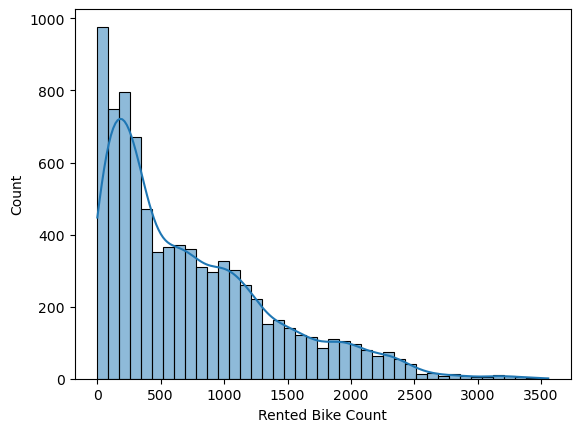

In [87]:
fig,ax = plt.subplots()
ax = sns.histplot(x='Rented Bike Count',data=data_removed_out,kde=True)

## Here we can clearly see that the graph is positively skewed and here are some observations 

 * Most of the observations lie between 200 to 800 
 * There are few bike counts which go upto 300 to 3500 which can be treated as outliers.
 

## Here we can clearly see that it is positively skewed let us check the skew value and it comes up to be around 0.923942

In [162]:
###let us apply some transformations 
#lET US APPLY THIS TRANSFORMATION ON THE DATA SINCE IT GETS SCALED DOWN TO GAUSSIAN DISTRIBUTION

In [160]:
#here im applying the square root transformation for the rented bike column.
data_removed_out['Rented Bike Count'] = np.sqrt(data_removed_out['Rented Bike Count'])

C:\Users\mailt\AppData\Local\Temp\ipykernel_17404\2764061988.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_removed_out['Rented Bike Count'] = np.sqrt(data_removed_out['Rented Bike Count'])


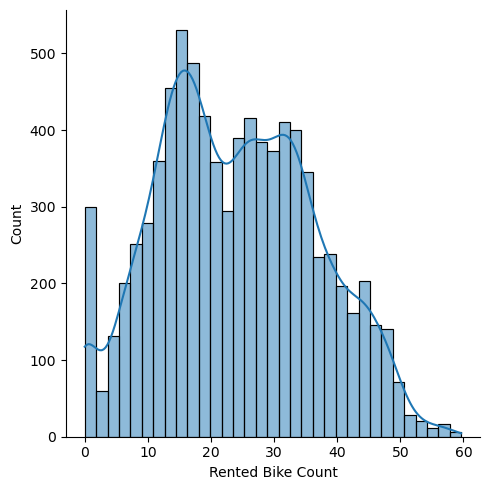

In [161]:
#let us check the graph now 
sns.displot(data_removed_out['Rented Bike Count'],kde=True)

### We have done target feature conditioning now we need to check the other columns as well

In [90]:
data_removed_out

,Rented Bike Count,Hour,Temperature(°C),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),WinterSeason,SummerSeason,AutumnSeason,SpringSeason,yes_Functioning,no_functioning,yes_hoiday,no_holiday,months,days,years
0,254,0,-5.2,2.2,2000,0.0,0.0,1,0,0,0,1,0,0,1,12,1,2017
1,204,1,-5.5,0.8,2000,0.0,0.0,1,0,0,0,1,0,0,1,12,1,2017
2,173,2,-6.0,1.0,2000,0.0,0.0,1,0,0,0,1,0,0,1,12,1,2017
3,107,3,-6.2,0.9,2000,0.0,0.0,1,0,0,0,1,0,0,1,12,1,2017
4,78,4,-6.0,2.3,2000,0.0,0.0,1,0,0,0,1,0,0,1,12,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,2.6,1894,0.0,0.0,0,0,1,0,1,0,0,1,11,30,2018
8756,764,20,3.4,2.3,2000,0.0,0.0,0,0,1,0,1,0,0,1,11,30,2018
8757,694,21,2.6,0.3,1968,0.0,0.0,0,0,1,0,1,0,0,1,11,30,2018
8758,712,22,2.1,1.0,1859,0.0,0.0,0,0,1,0,1,0,0,1,11,30,2018


In [91]:
#let us check the datatypes again before proceeding
data_removed_out.dtypes

Rented Bike Count            int64
Hour                         int64
Temperature(°C)            float64
Wind speed (m/s)           float64
Visibility (10m)             int64
Solar Radiation (MJ/m2)    float64
Rainfall(mm)               float64
WinterSeason                 int32
SummerSeason                 int32
AutumnSeason                 int32
SpringSeason                 int32
yes_Functioning              int32
no_functioning               int32
yes_hoiday                   int32
no_holiday                   int32
months                       int64
days                         int64
years                        int64
dtype: object

## Since all our columns are in numeric format we are good to go.

### We can start with our machine learning modelling

In [101]:
## let us import the libraries 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso

In [93]:
#let us first split the data.
X = data_removed_out.drop('Rented Bike Count',axis=1)
y = data_removed_out['Rented Bike Count']
print(X.shape,y.shape)

(8317, 17) (8317,)


In [94]:
#now that we have split our data we can now  split it into train and test sets 
np.random.seed(42)#so that we get the same results
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)#here we have taken 80 percent of data for training and 20 percent for testing


In [158]:
%%time
#let us call the model class
lg = LinearRegression()
#let us now fit the model 
lg.fit(x_train,y_train)
# now that we have fit the model let us evaluate on the training and test data using score method 
training_score=lg.score(x_train,y_train)
test_score=lg.score(x_test,y_test)
print(training_score*100,test_score*100)

52.0177989243373 50.825544519212876
CPU times: total: 188 ms
Wall time: 179 ms


In [96]:
#now we will build our custom evaluation metric 
def custom_eval(model):
    '''This function will show us different evaluation metrics for our model'''
    training_preds = model.predict(x_train)
    test_preds = model.predict(x_test)
    scores={'MSE for training':mean_squared_error(y_train,training_preds),#these are our scores of different evaluation metrics of our model.
           'MSE for test':mean_squared_error(y_test,test_preds),
           'MAE for training':mean_absolute_error(y_train,training_preds),
           'MAE for test':mean_absolute_error(y_test,test_preds),
           'R^2 for training':r2_score(y_train,training_preds),
            'R^2 for test':r2_score(y_test,test_preds)}
    return scores
    

In [97]:
#let us try out the function 
baseline_metrics_linear_reg= custom_eval(lg)
baseline_metrics_linear_reg#this is the evaluation on the base linear regression model.

{'MSE for training': 202880.55742928304,
 'MSE for test': 204904.91530253144,
 'MAE for training': 336.2208475280058,
 'MAE for test': 335.9301461366264,
 'R^2 for training': 0.520177989243373,
 'R^2 for test': 0.5082554451921287}

In [98]:
%%time
#now let us fit the random forest regressor model.
rf_rg = RandomForestRegressor()
#let us fit the data
rf_rg.fit(x_train,y_train)
#let us check the baseline scores
rf_training_score = rf_rg.score(x_train,y_train)
rf_test_score = rf_rg.score(x_test,y_test)
print(rf_training_score*100,rf_test_score*100)

98.08799945943315 87.12779138226426
CPU times: total: 6.44 s
Wall time: 6.45 s


In [99]:
#let us evaluate the model
baseline_metrics_random_forest=custom_eval(rf_rg)
baseline_metrics_random_forest#this is the evaluation on the base random forest model

{'MSE for training': 8084.408942882909,
 'MSE for test': 53637.17382908654,
 'MAE for training': 53.25564707650684,
 'MAE for test': 144.57306490384616,
 'R^2 for training': 0.9808799945943315,
 'R^2 for test': 0.8712779138226426}

### What are the metrics we are using to evaluate the model? to be continued


* The metrics we will be using are the mean squared error , mean absolute error and the r2 score metricas 

> r2 score / R^2/coefficient of determination 

> Mean Absolute Error 

> Mean Sqaured Error



In [124]:
#let us start with hyper parameter tunning along with finding the optimal model complexity using l1 and l2 regularization let us proceed.
%time
#we made a dictionary of the hyperparameter values
hyper_grid = {"n_estimators": np.arange(30, 100, 10),
           "max_depth": [None,3,5,10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [1000]}

#now let us call the radomized search cv to try and improve the perfromance of the random forest regressor class
rs_cv = RandomizedSearchCV(estimator=RandomForestRegressor(),#this is our estimator 
                          param_distributions=hyper_grid,#here we pass our dictioanryu that we defined earlier
                          n_iter=100,#these are the number of iterations we want to run
                          cv=5,#5 fold cross validation
                          verbose=True#we want to display the results as well
                          )
#let us now fit the model 
rs_cv.fit(x_train,y_train)
                           
    
            

CPU times: total: 0 ns
Wall time: 0 ns
Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\mailt\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\mailt\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\mailt\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\Users\mailt\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\mailt\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\mailt\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\Users\mailt\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\mailt\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\mailt\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\Users\mailt\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\mailt\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\mailt\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\Users\mailt\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [1000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [125]:
#let us check out the best params 
best_params=rs_cv.best_params_
best_params

{'n_estimators': 60,
 'min_samples_split': 12,
 'min_samples_leaf': 3,
 'max_samples': 1000,
 'max_features': 0.5,
 'max_depth': None}

In [155]:
#now let us  use these parametes and check if then model performance has improved 
np.random.seed(42)
#let make an instance of the class
rf_best_params = RandomForestRegressor(n_estimators=100,min_samples_split=3,max_samples=1000,min_samples_leaf=1,max_features=0.6,max_depth=20)#we fit the best params in this scenario to check if these will improve the performnance of the model or decrease it.Of course what we want is increasing.
#let us now fit the model
rf_best_params.fit(x_train,y_train)
#let us check out the score 
rf_best_params.score(x_test,y_test)#r2 score/R^2/coefficient of determination.]


0.8529421381595659

## Here we can see that our accuracy decreased a little bit ,let us check out the evaluation metrics 

In [156]:
custom_eval(rf_best_params)

{'MSE for training': 47722.7252503475,
 'MSE for test': 61277.503594846516,
 'MAE for training': 140.05454230727858,
 'MAE for test': 161.57788691081808,
 'R^2 for training': 0.8871335219177453,
 'R^2 for test': 0.8529421381595659}

In [157]:
#let us go back to the baseline metrics 
baseline_metrics_random_forest

{'MSE for training': 8084.408942882909,
 'MSE for test': 53637.17382908654,
 'MAE for training': 53.25564707650684,
 'MAE for test': 144.57306490384616,
 'R^2 for training': 0.9808799945943315,
 'R^2 for test': 0.8712779138226426}

## From both the models the model wee can see that the model performed better on the baseline alone so the baseline model is our ideal model.

### Observations from the evaluation metrics---  

1. 


## Model driven EDA 

In [166]:
#let us check for feature importance
important_feats=rf_rg.feature_importances_#this displays values of every feature and signifying its importance
important_feats

array([2.92029809e-01, 2.94405914e-01, 2.25091149e-02, 2.94767258e-02,
       1.06414484e-01, 7.78103753e-02, 1.94433588e-02, 1.85143106e-03,
       1.25153987e-02, 2.89285145e-03, 4.02375401e-02, 5.20206816e-02,
       1.23321146e-03, 1.39625589e-03, 2.16142469e-02, 2.39768086e-02,
       1.71792041e-04])

It is obvious from above all we have is an array of values which cannot tell us much how about we visualize these values 

In [189]:
feature_dict = dict(zip(X.columns,important_feats))
feature_dict#here we have made use of the zip function and clubbed the respective columns to their importance values.|

{'Hour': 0.29202980943370815,
 'Temperature(°C)': 0.2944059139451058,
 'Wind speed (m/s)': 0.022509114855748327,
 'Visibility (10m)': 0.029476725848206306,
 'Solar Radiation (MJ/m2)': 0.1064144841040326,
 'Rainfall(mm)': 0.0778103752994117,
 'WinterSeason': 0.019443358753037918,
 'SummerSeason': 0.0018514310623390035,
 'AutumnSeason': 0.012515398676569084,
 'SpringSeason': 0.002892851447740662,
 'yes_Functioning': 0.04023754010452426,
 'no_functioning': 0.052020681573582646,
 'yes_hoiday': 0.0012332114635977371,
 'no_holiday': 0.001396255887713583,
 'months': 0.021614246900179556,
 'days': 0.023976808603829624,
 'years': 0.0001717920406729222}

In [190]:
#create an empty data frame 
features = pd.DataFrame(feature_dict,index=[0])
features#this will give us a  dataframe of the above dictionary values.

,Hour,Temperature(°C),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),WinterSeason,SummerSeason,AutumnSeason,SpringSeason,yes_Functioning,no_functioning,yes_hoiday,no_holiday,months,days,years
0,0.29203,0.294406,0.022509,0.029477,0.106414,0.07781,0.019443,0.001851,0.012515,0.002893,0.040238,0.052021,0.001233,0.001396,0.021614,0.023977,0.000172


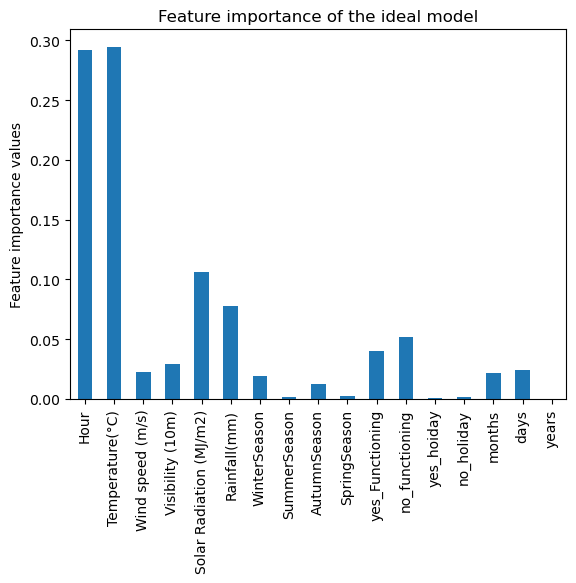

In [191]:
#let us directly plot from pandas dataframe.
features.T.plot.bar()#we are visualizing the feature importance in our dataframes by taking the transpose.
plt.title('Feature importance of the ideal model')
plt.ylabel('Feature importance values')
plt.legend().remove()#this removes the legend from our plot.
plt.show()#this is like the print statement  of the matplotlib library


## OBSERVATIONS - 

*

## Let us derive our conclusions now .

1) How can my project be useful to stake holders?
* Stakeholders can make use of the insights and obsevations that i have derived for better decision making and be able to rent more bicycles to make for profit and increase their companies name 

* They can also use my project as a means to understand the trends and patters as to why and when a cycle is rented and under what condtion is it rented etc.